In [2]:
#################################################################
##    Marketing analytics                                      ##
##    Exercise in Segmentation                     	           ##
##    Cluster Analysis using CustomerTransactions              ##
##    Abdulkadir Kadioglu 1508829                              ##
#################################################################

In [9]:
# Read the Data
CustomerTransactions<-read.csv("http://kadirkadioglu.com/bigdata/marketinganalysis/week4/CustomerTransactions.csv",header=T)

# Show the first few rows of the data
head(CustomerTransactions)


ID,CustomerLastName,X1,X2,X3,X4,X5,X6,X7,X8,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
1,Adams,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,Allen,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Anderson,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,Bailey,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,Baker,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,Barnes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
#Show attributes
attributes(CustomerTransactions)

$names
 [1] "ID"               "CustomerLastName" "X1"               "X2"              
 [5] "X3"               "X4"               "X5"               "X6"              
 [9] "X7"               "X8"               "X9"               "X10"             
[13] "X11"              "X12"              "X13"              "X14"             
[17] "X15"              "X16"              "X17"              "X18"             
[21] "X19"              "X20"              "X21"              "X22"             
[25] "X23"              "X24"              "X25"              "X26"             
[29] "X27"              "X28"              "X29"              "X30"             
[33] "X31"              "X32"             

$class
[1] "data.frame"

$row.names
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

In [6]:
#Remove First 2 columns from our Dataset because they are not irrelevent for our segmentation
newCustomerTransactions <- CustomerTransactions[, -c(1,2)]


In [7]:
# Show the first few rows of the data of newCustomerTransactions
head(newCustomerTransactions)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [8]:
#Show attributes of newCustomerTransactions
attributes(newCustomerTransactions)

$names
 [1] "X1"  "X2"  "X3"  "X4"  "X5"  "X6"  "X7"  "X8"  "X9"  "X10" "X11" "X12"
[13] "X13" "X14" "X15" "X16" "X17" "X18" "X19" "X20" "X21" "X22" "X23" "X24"
[25] "X25" "X26" "X27" "X28" "X29" "X30" "X31" "X32"

$class
[1] "data.frame"

$row.names
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

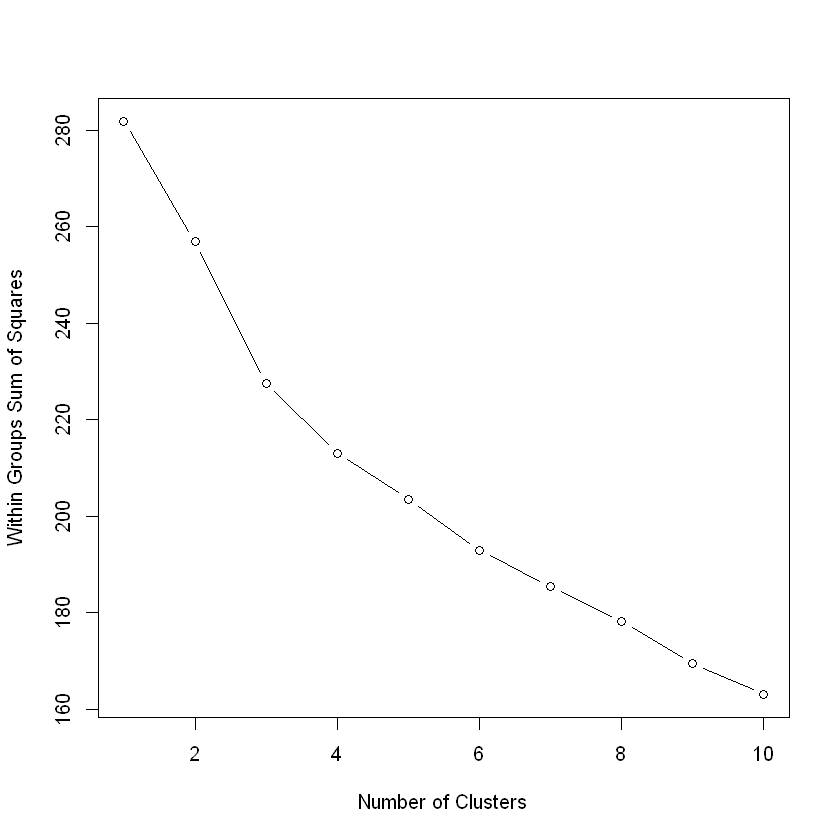

In [10]:
#Elbow Criterion
wssplot <- function(newCustomerTransactions, nc= 15, seed=1234)
{
  wss <- (nrow(newCustomerTransactions)-1)*sum(apply(newCustomerTransactions,2,var))
  for (i in 2:nc)
    {
    set.seed(seed)
  wss[i] <- sum(kmeans(newCustomerTransactions, centers = i)$withinss)
}

plot(1:nc, wss, type = "b", xlab= "Number of Clusters", ylab = "Within Groups Sum of Squares")
}

wssplot(newCustomerTransactions, nc=10)

In [11]:
#Plot Shows that from 2 to 3 there are extremely change so i would like to build a model with 3 clusters
#Building K-Means with 3 clusters

Model1 <- kmeans(newCustomerTransactions, centers = 3, iter.max =20)
summary(Model1)

Model1$withinss
Model1$cluster

summary(Model1)

             Length Class  Mode   
cluster      100    -none- numeric
centers       96    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

[1]  59.42857  19.31250 148.81633

[1] 1 3 2 1 3 3 2 1 3 1 3 2 1 3 3 2 3 2 1 3 1 1 3 3 2 3 3 3 3 2 1 1 3 3 1 1 3
 [38] 1 3 1 2 2 1 3 1 3 1 1 3 3 3 3 3 2 3 1 2 1 1 3 3 1 3 1 1 2 2 3 3 3 3 3 3 1
 [75] 3 1 2 1 1 2 3 3 3 2 1 1 1 3 3 1 3 1 3 1 3 3 1 3 3 3

             Length Class  Mode   
cluster      100    -none- numeric
centers       96    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

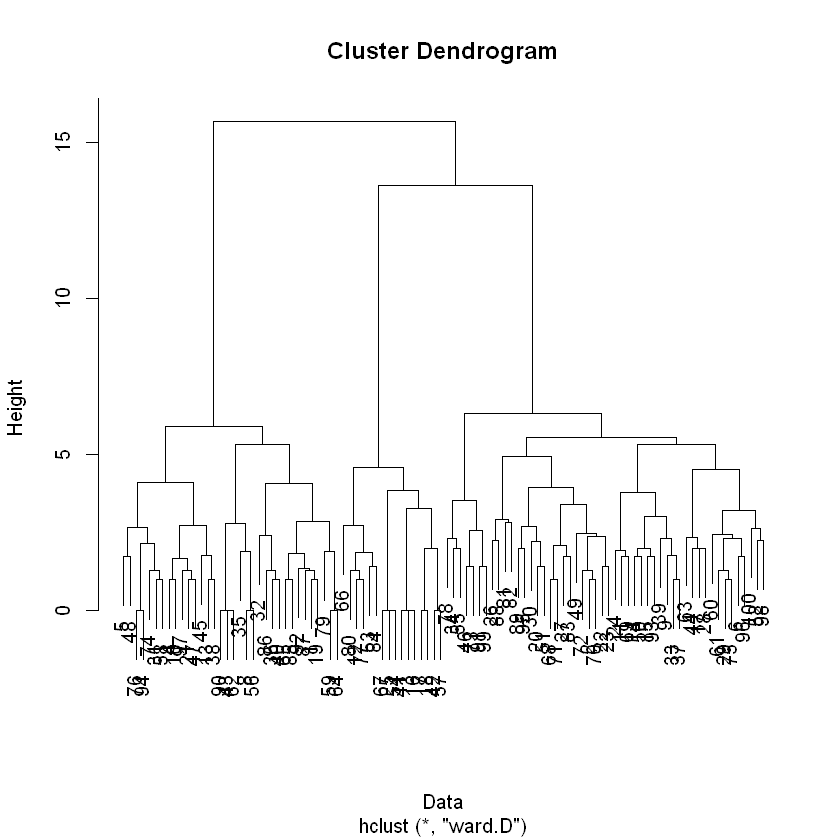

In [12]:
#Hierarchial clusterring wirh ward.D Method for Model2

Data <- dist(newCustomerTransactions, method = "euclidean")
Model2 <- hclust(Data, method = "ward.D")
plot(Model2)

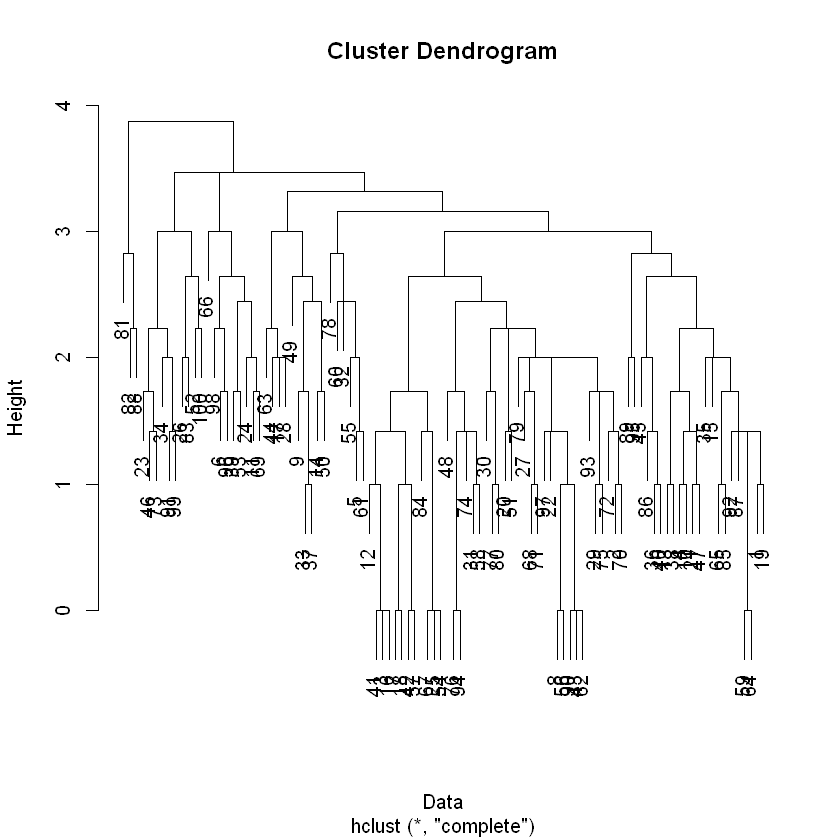

In [13]:
#Hierarchial clusterring wirh Complete Method for Model3

Data <- dist(newCustomerTransactions, method = "euclidean")
Model3 <- hclust(Data, method = "complete")
plot(Model3)

In [16]:
#Model3 plot shows that there are more groups than model2 so i prefer to use Model2
#Cutree
groups <- cutree(Model2, k=3)


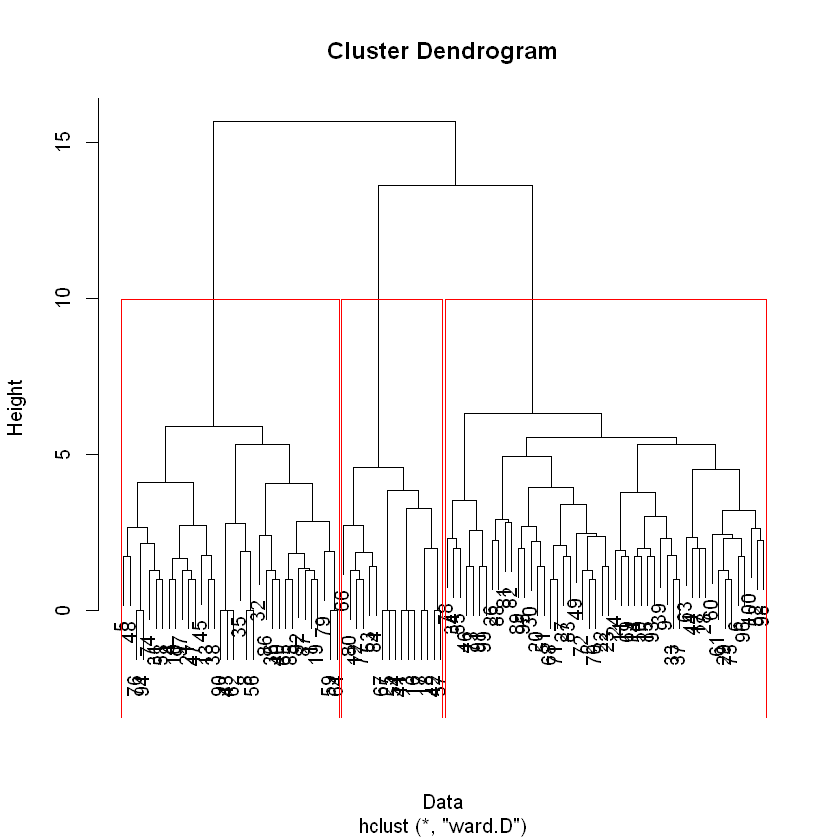

In [18]:
plot(Model2)
rect.hclust(Model2, k=3, border = "red")